<a href="https://colab.research.google.com/github/LuanK63/6351071043_LAB3/blob/main/6351071043_LAB3_Bai2(Trang18_19).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. Yêu cầu lập trình

Cho dữ liệu Mua sắm của khách hàng Mall customer3 bao gồm các thông tin sau: Giới
tính (Gender), Tuổi (Age), Thu nhập hằng năm (Annual income – đơn vị tính: nghìn đô) và Số điểm mua sắm (Spending Score – từ 1 đến 100). Sinh viên hãy thực hiện những
yêu cầu sau đây:

1. Nhập dữ liệu, thống kê các thông tin cơ bản, xử lý dữ liệu bị thiếu.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.graph_objs as go
import plotly.offline as py

%matplotlib inline
plt.style.use('fivethirtyeight')

data = pd.read_csv('Mall_Customers.csv')

print("\nNguyễn Thành Luân - 6351071043")
print("Dữ liệu đầu vào:")
data.head()

print("\nKiểm tra giá trị null:")
print(data.isnull().sum())

print("\nThống kê mô tả:")
data.describe()


Nguyễn Thành Luân - 6351071043
Dữ liệu đầu vào:

Kiểm tra giá trị null:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Thống kê mô tả:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


2. Sử dụng biểu đồ tần suất (Histogram) để biểu diễn phân phối của lần lượt các thuộc
tính Tuổi, Thu nhập hằng năm và Số điểm mua sắm.


Nguyễn Thành Luân - 6351071043


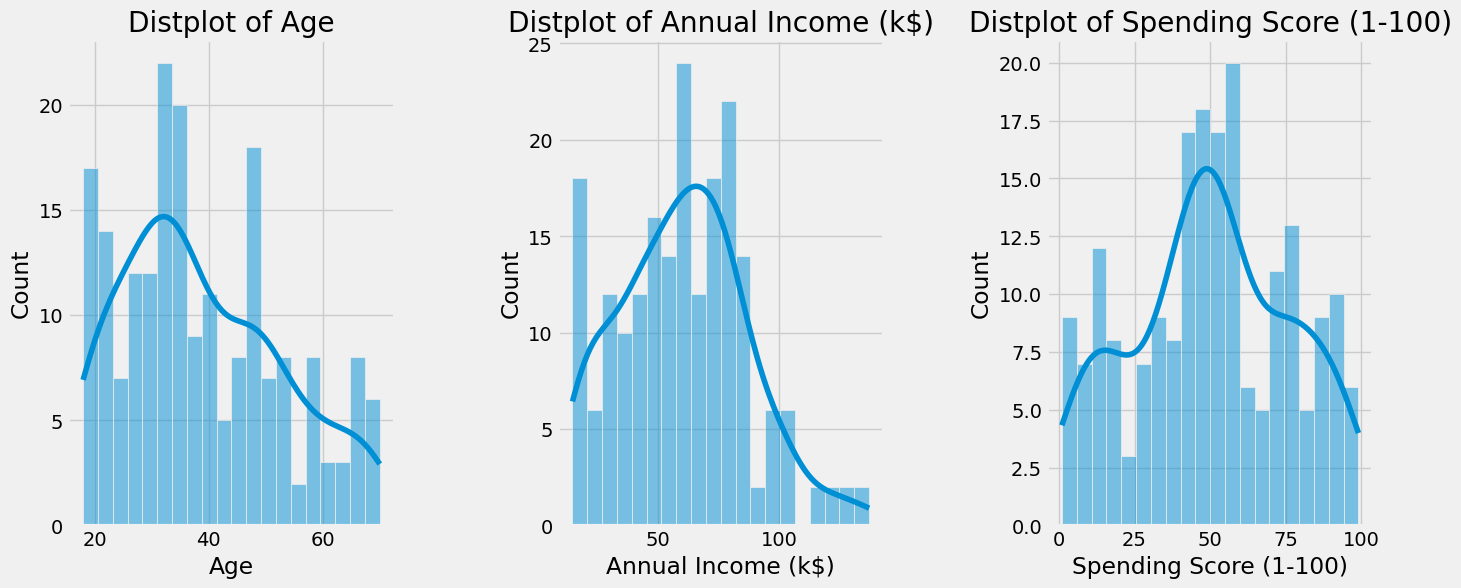

In [4]:
print("\nNguyễn Thành Luân - 6351071043")
plt.figure(1, figsize=(15, 6))
n = 0
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for x in features:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(data[x], bins=20, kde=True)
    plt.title(f'Distplot of {x}')

plt.show()

3. Thống kê số mẫu dữ liệu theo thuộc tính Giới tính.


Nguyễn Thành Luân - 6351071043


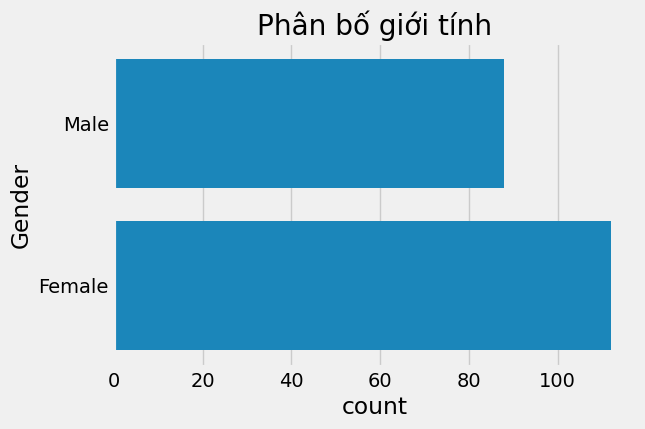

Số lượng cụ thể:
Gender
Female    112
Male       88
Name: count, dtype: int64


In [5]:
print("\nNguyễn Thành Luân - 6351071043")
plt.figure(figsize=(6, 4))
sns.countplot(y='Gender', data=data)
plt.title('Phân bố giới tính')
plt.show()

print("Số lượng cụ thể:")
print(data['Gender'].value_counts())

4. Sử dụng biểu đồ phân tán (Scatter plot) để khảo sát phân bố của thuộc tính Tuổi và
Thu nhập hằng năm theo Giới tính.


Nguyễn Thành Luân - 6351071043


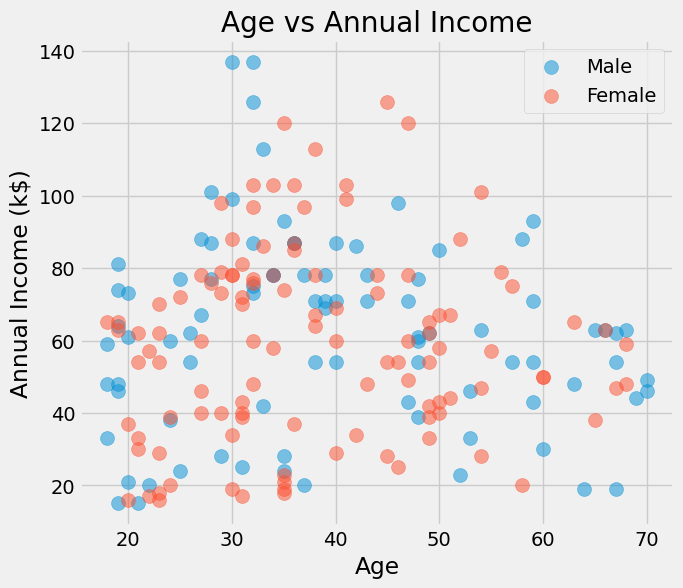

In [6]:
print("\nNguyễn Thành Luân - 6351071043")
plt.figure(1, figsize=(15, 6))

plt.subplot(1, 2, 1)
for gender in ['Male', 'Female']:
    plt.scatter(x='Age', y='Annual Income (k$)', data=data[data['Gender'] == gender],
                s=100, alpha=0.5, label=gender)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income')
plt.legend()

5. Tương tự câu 4, khảo sát thuộc tính Thu nhập hằng năm và Số điểm mua sắm theo
Giới tính.


Nguyễn Thành Luân - 6351071043


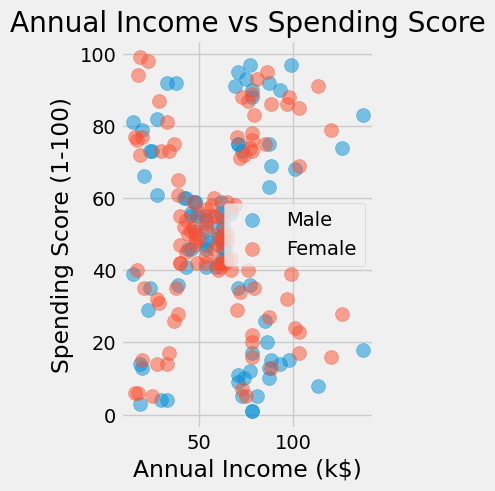

In [7]:
print("\nNguyễn Thành Luân - 6351071043")
plt.subplot(1, 2, 2)
for gender in ['Male', 'Female']:
    plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=data[data['Gender'] == gender],
                s=100, alpha=0.5, label=gender)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.legend()

plt.show()

6. Chọn thuộc tính Tuổi và Số điểm mua sắm để gom cụm. Sử dụng phương pháp khuỷu
tay (ELBOW method) để xác định số cụm cần thiết. Tiến hành gom cụm bằng thuật
toán k-Means với số cụm vừa xác định.


Nguyễn Thành Luân - 6351071043


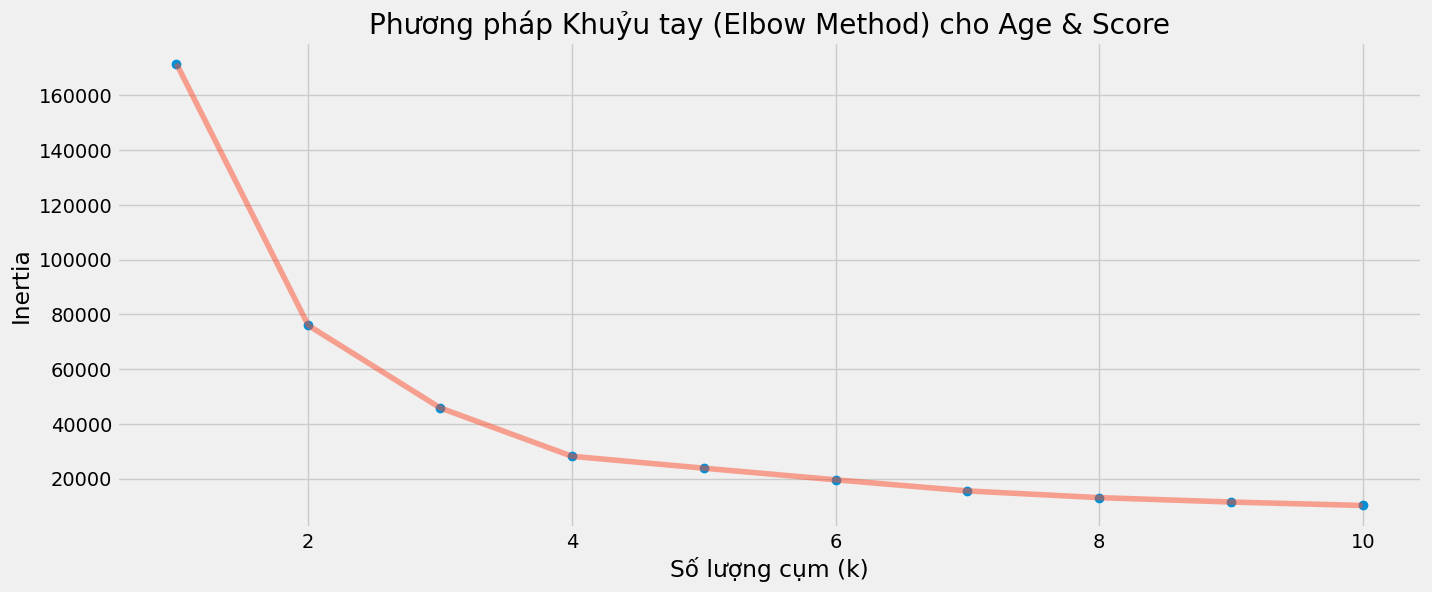

In [8]:
print("\nNguyễn Thành Luân - 6351071043")
X_age_score = data[['Age', 'Spending Score (1-100)']].values

inertia = []
for n in range(1, 11):
    algorithm = KMeans(n_clusters=n, init='k-means++', n_init=10, random_state=42)
    algorithm.fit(X_age_score)
    inertia.append(algorithm.inertia_)

plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)
plt.xlabel('Số lượng cụm (k)'), plt.ylabel('Inertia')
plt.title('Phương pháp Khuỷu tay (Elbow Method) cho Age & Score')
plt.grid(True)
plt.show()


7. Biểu diễn kết quả gom cụm trên bằng biểu đồ.


Nguyễn Thành Luân - 6351071043


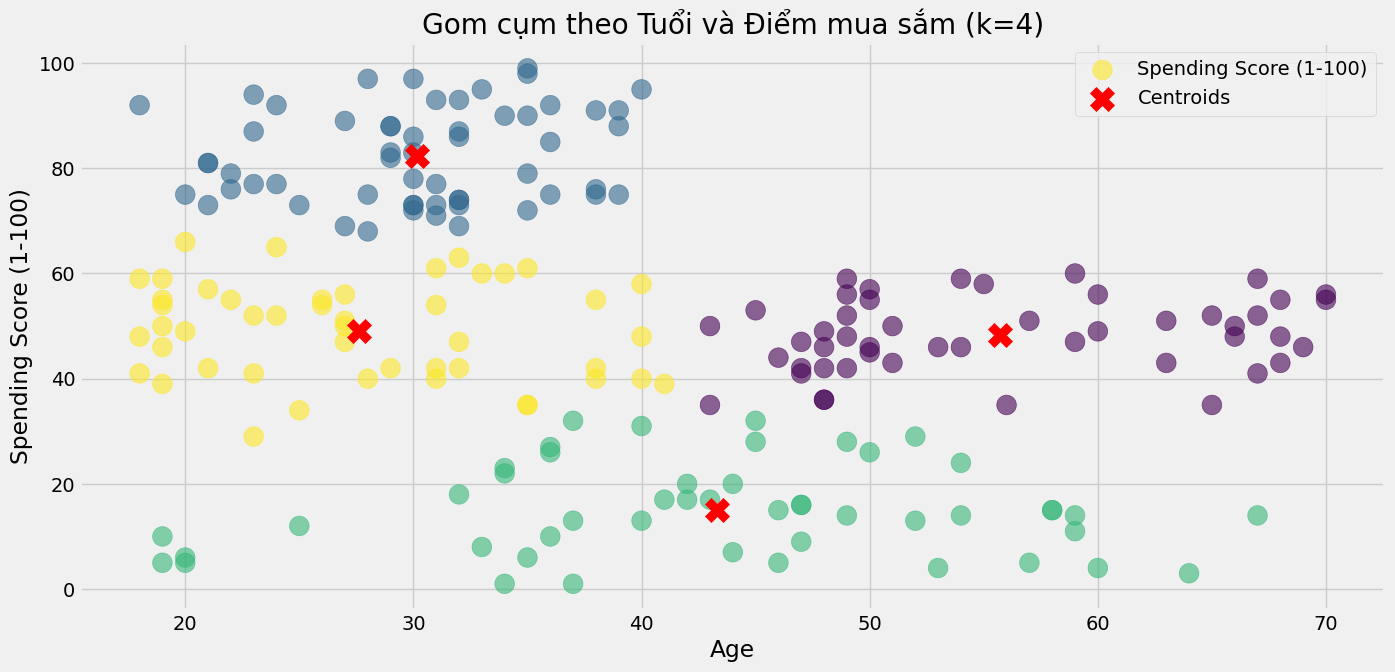

In [9]:
print("\nNguyễn Thành Luân - 6351071043")
k_age = 4
algorithm_age = KMeans(n_clusters=k_age, init='k-means++', n_init=10, random_state=42)
algorithm_age.fit(X_age_score)

labels_age = algorithm_age.labels_
centroids_age = algorithm_age.cluster_centers_

plt.figure(1, figsize=(15, 7))
plt.clf()

plt.scatter(x='Age', y='Spending Score (1-100)', data=data, c=labels_age, s=200, cmap='viridis', alpha=0.6)

plt.scatter(x=centroids_age[:, 0], y=centroids_age[:, 1], s=300, c='red', alpha=1, marker='X', label='Centroids')

plt.ylabel('Spending Score (1-100)'), plt.xlabel('Age')
plt.title(f'Gom cụm theo Tuổi và Điểm mua sắm (k={k_age})')
plt.legend()
plt.show()

8. Đánh giá kết quả gom cụm bằng Hệ số Dáng điệu (Silhouette coefficient).

In [10]:
print("\nNguyễn Thành Luân - 6351071043")
score_age = silhouette_score(X_age_score, labels_age)
print(f"Hệ số Silhouette (Age & Score, k={k_age}): {score_age:.4f}")
print("(Giá trị càng gần 1 thì các cụm càng tách biệt tốt)")


Nguyễn Thành Luân - 6351071043
Hệ số Silhouette (Age & Score, k=4): 0.4997
(Giá trị càng gần 1 thì các cụm càng tách biệt tốt)


9. Thực hiện tương tự câu 6-8 với trường hợp gom cụm theo các thuộc tính:
- Thu nhập hằng năm và Số điểm mua sắm.
- Tuổi, Thu nhập hằng năm và Số điểm mua sắm (thực hiện vẽ biểu đồ 3D để biểu
diễn kết quả gom cụm).


Nguyễn Thành Luân - 6351071043


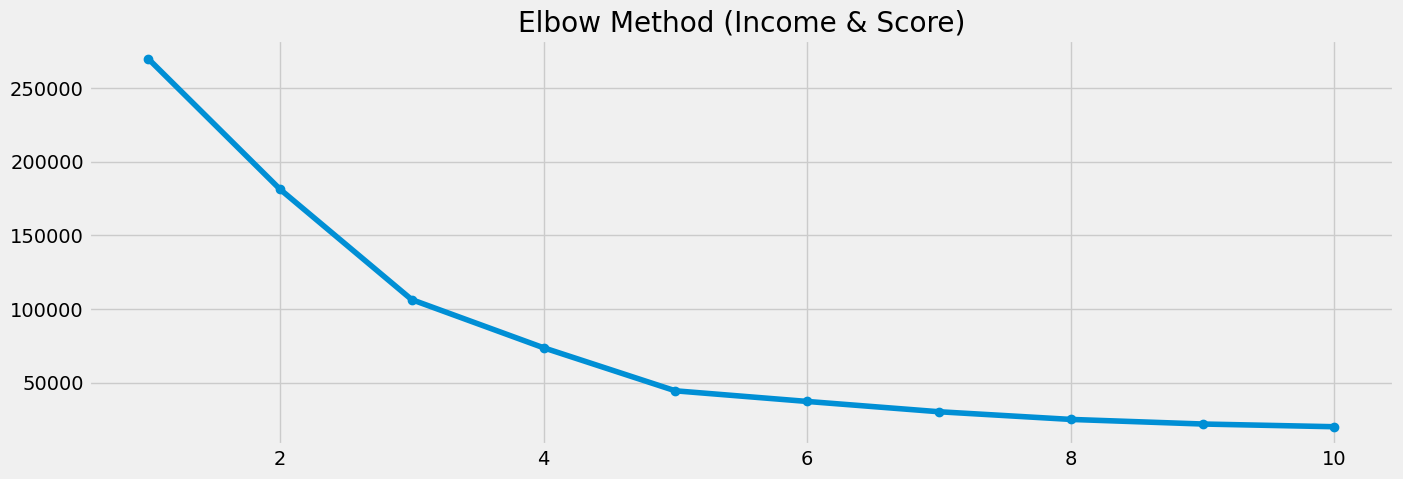


Nguyễn Thành Luân - 6351071043
Chọn số cụm k=5 dựa trên biểu đồ.


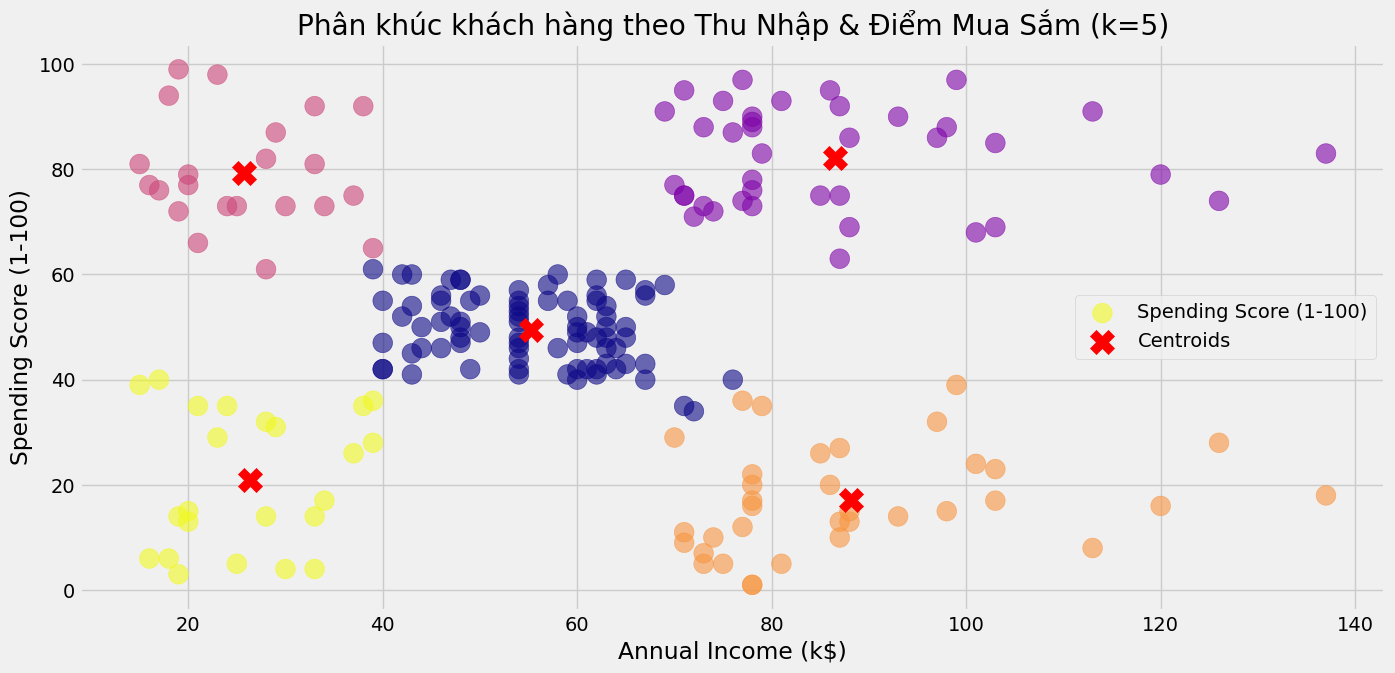

Hệ số Silhouette (Income & Score, k=5): 0.5539


In [11]:
print("\nNguyễn Thành Luân - 6351071043")
X_inc_score = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

inertia_inc = []
for n in range(1, 11):
    alg = KMeans(n_clusters=n, init='k-means++', n_init=10, random_state=42)
    alg.fit(X_inc_score)
    inertia_inc.append(alg.inertia_)

plt.figure(1, figsize=(15, 5))
plt.plot(np.arange(1, 11), inertia_inc, 'o-')
plt.title('Elbow Method (Income & Score)')
plt.show()

print("\nNguyễn Thành Luân - 6351071043")
k_inc = 5
print(f"Chọn số cụm k={k_inc} dựa trên biểu đồ.")
alg_inc = KMeans(n_clusters=k_inc, init='k-means++', n_init=10, random_state=42)
alg_inc.fit(X_inc_score)
labels_inc = alg_inc.labels_
centroids_inc = alg_inc.cluster_centers_

plt.figure(1, figsize=(15, 7))
plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, c=labels_inc, s=200, cmap='plasma', alpha=0.6)
plt.scatter(x=centroids_inc[:, 0], y=centroids_inc[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title(f'Phân khúc khách hàng theo Thu Nhập & Điểm Mua Sắm (k={k_inc})')
plt.legend()
plt.show()

print(f"Hệ số Silhouette (Income & Score, k={k_inc}): {silhouette_score(X_inc_score, labels_inc):.4f}")

In [12]:
print("\nNguyễn Thành Luân - 6351071043")
X3 = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

k_3d = 6
algorithm3 = KMeans(n_clusters=k_3d, init='k-means++', n_init=10, random_state=42)
algorithm3.fit(X3)
labels3 = algorithm3.labels_

data['label3'] = labels3

trace = go.Scatter3d(
    x=data['Age'],
    y=data['Spending Score (1-100)'],
    z=data['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color=data['label3'],
        size=8,
        line=dict(color=data['label3'], width=0.5),
        opacity=0.8
    )
)

layout = go.Layout(
    title=f'Gom cụm 3D (k={k_3d})',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score'),
        zaxis=dict(title='Annual Income')
    )
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()


Nguyễn Thành Luân - 6351071043
